In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
df = pd.read_csv('./data/공공자전거 대여이력 정보_2020.06.csv', engine = 'python')
df

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-36260,2020-06-01 00:00:35,1681,현대6차 아파트,0,2020-06-01 00:05:24,1665,양지근린공원앞,0,5,0.00
1,SPB-36146,2020-06-01 00:01:47,816,신용산역 6번출구 앞,0,2020-06-01 00:05:54,829,베르가모앞,0,4,0.00
2,SPB-33273,2020-06-01 00:03:05,1050,둔촌역 3번 출입구,0,2020-06-01 00:05:59,1078,둔촌사거리,0,3,0.00
3,SPB-35969,2020-06-01 00:04:31,1209,잠실나루역 (2번 출구 쪽),0,2020-06-01 00:06:10,1209,잠실나루역 (2번 출구 쪽),0,2,0.00
4,SPB-30703,2020-06-01 00:00:46,1132,등촌역 7번출구,0,2020-06-01 00:06:53,1169,염창역 1번 출구,0,6,0.00
...,...,...,...,...,...,...,...,...,...,...,...
2725232,SPB-12680,2020-06-30 13:01:33,1346,길음8골어린이공원 옆,1,2020-07-01 02:50:27,1347,길음래미안아파트817동 상가 앞,1,15,7230.00
2725233,SPB-40800,2020-06-30 23:56:30,107,신한은행 서교동금융센터점 앞,0,2020-07-01 07:41:32,438,성산2-1 공영주차장,0,465,0.00
2725234,SPB-32402,2020-06-30 16:45:32,1956,도야미리숯불갈비 앞,0,2020-07-01 08:04:52,1956,도야미리숯불갈비 앞,0,919,39786.76
2725235,SPB-38526,2020-06-30 23:23:38,703,오목교역 7번출구 앞,0,2020-07-01 08:37:15,734,신트리공원 입구,0,554,0.00


In [3]:
df = df.drop(['자전거번호', '대여대여소번호', '대여거치대', '반납대여소번호', '반납거치대', '이용시간', '이용거리'], axis = 1)
df

,대여일시,대여대여소명,반납일시,반납대여소명
0,2020-06-01 00:00:35,현대6차 아파트,2020-06-01 00:05:24,양지근린공원앞
1,2020-06-01 00:01:47,신용산역 6번출구 앞,2020-06-01 00:05:54,베르가모앞
2,2020-06-01 00:03:05,둔촌역 3번 출입구,2020-06-01 00:05:59,둔촌사거리
3,2020-06-01 00:04:31,잠실나루역 (2번 출구 쪽),2020-06-01 00:06:10,잠실나루역 (2번 출구 쪽)
4,2020-06-01 00:00:46,등촌역 7번출구,2020-06-01 00:06:53,염창역 1번 출구
...,...,...,...,...
2725232,2020-06-30 13:01:33,길음8골어린이공원 옆,2020-07-01 02:50:27,길음래미안아파트817동 상가 앞
2725233,2020-06-30 23:56:30,신한은행 서교동금융센터점 앞,2020-07-01 07:41:32,성산2-1 공영주차장
2725234,2020-06-30 16:45:32,도야미리숯불갈비 앞,2020-07-01 08:04:52,도야미리숯불갈비 앞
2725235,2020-06-30 23:23:38,오목교역 7번출구 앞,2020-07-01 08:37:15,신트리공원 입구


In [4]:
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])

In [5]:
df['대여월'] = df['대여일시'].dt.month
df['대여일'] = df['대여일시'].dt.day
df['대여요일'] = df['대여일시'].dt.dayofweek
df['대여시간'] = df['대여일시'].dt.hour
df['대여시간_분'] = df['대여일시'].dt.minute

df['반납월'] = df['반납일시'].dt.month
df['반납일'] = df['반납일시'].dt.day
df['반납요일'] = df['반납일시'].dt.dayofweek
df['반납시간'] = df['반납일시'].dt.hour
df['반납시간_분'] = df['반납일시'].dt.minute

In [6]:
df = df.sort_values('대여일시', ignore_index = True)

In [7]:
df = df[df['대여월'] != 5]
df = df[df['반납월'] != 7]

In [8]:
df['대여대여소명'] = df['대여대여소명'].astype('category')
df['반납대여소명'] = df['반납대여소명'].astype('category')

### 평균서비스율(10분당 자전거 대여수의 평균) = $\mu$
- $\mu$ = 10이면 10분동안 평균 10대의 자전거 대여

In [9]:
df_rental = df[['대여일시', '대여대여소명', '대여월', '대여일', '대여요일', '대여시간', '대여시간_분']]
df_rental.reset_index(drop = True, inplace = True)
df_rental

,대여일시,대여대여소명,대여월,대여일,대여요일,대여시간,대여시간_분
0,2020-06-01 00:00:00,합정역 7번출구 앞,6,1,0,0,0
1,2020-06-01 00:00:16,응암시장교차로,6,1,0,0,0
2,2020-06-01 00:00:24,삼호물산버스정류장(23370) 옆,6,1,0,0,0
3,2020-06-01 00:00:26,능골근린공원,6,1,0,0,0
4,2020-06-01 00:00:32,응봉역 1번출구,6,1,0,0,0
...,...,...,...,...,...,...,...
2724714,2020-06-30 23:55:01,천호초교 입구 사거리(일주빌딩),6,30,1,23,55
2724715,2020-06-30 23:55:17,가좌삼거리,6,30,1,23,55
2724716,2020-06-30 23:56:01,신사역 4번출구 뒤,6,30,1,23,56
2724717,2020-06-30 23:56:41,쌍문현대1차아파트 108동 앞,6,30,1,23,56


In [10]:
df_rental = df_rental[df_rental['대여대여소명'] == '마포구민체육센터 앞']
df_rental.reset_index(drop = True, inplace = True)
df_rental

,대여일시,대여대여소명,대여월,대여일,대여요일,대여시간,대여시간_분
0,2020-06-01 00:34:40,마포구민체육센터 앞,6,1,0,0,34
1,2020-06-01 00:53:19,마포구민체육센터 앞,6,1,0,0,53
2,2020-06-01 00:54:05,마포구민체육센터 앞,6,1,0,0,54
3,2020-06-01 02:20:07,마포구민체육센터 앞,6,1,0,2,20
4,2020-06-01 06:34:12,마포구민체육센터 앞,6,1,0,6,34
...,...,...,...,...,...,...,...
11526,2020-06-30 20:53:12,마포구민체육센터 앞,6,30,1,20,53
11527,2020-06-30 21:10:28,마포구민체육센터 앞,6,30,1,21,10
11528,2020-06-30 23:17:36,마포구민체육센터 앞,6,30,1,23,17
11529,2020-06-30 23:19:54,마포구민체육센터 앞,6,30,1,23,19


#### 0시

In [11]:
df_rental_hour = df_rental[df_rental['대여시간'] == 0]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,81
1,10,92
2,20,90
3,30,79
4,40,72
5,50,54


In [12]:
# 10분당 평균 대여율 = 평균서비스율

mu0 = df_rental_hour_group['count'].sum() / 6
mu0

78.0

#### 1시

In [13]:
df_rental_hour = df_rental[df_rental['대여시간'] == 1]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,74
1,10,59
2,20,53
3,30,40
4,40,52
5,50,35


In [14]:
# 1시 10분당 평균 대여율 = 평균서비스율

mu1 = df_rental_hour_group['count'].sum() / 6
mu1

52.166666666666664

#### 2시

In [15]:
df_rental_hour = df_rental[df_rental['대여시간'] == 2]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,27
1,10,33
2,20,29
3,30,24
4,40,28
5,50,22


In [16]:
# 2시 10분당 평균 대여율 = 평균서비스율

mu2 = df_rental_hour_group['count'].sum() / 6
mu2

27.166666666666668

#### 3시

In [17]:
df_rental_hour = df_rental[df_rental['대여시간'] == 3]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,26
1,10,15
2,20,10
3,30,18
4,40,5
5,50,6


In [18]:
# 10분당 평균 대여율 = 평균서비스율

mu3 = df_rental_hour_group['count'].sum() / 6
mu3

13.333333333333334

#### 4시

In [19]:
df_rental_hour = df_rental[df_rental['대여시간'] == 4]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,13
1,10,6
2,20,14
3,30,11
4,40,4
5,50,9


In [20]:
# 10분당 평균 대여율 = 평균서비스율

mu4 = df_rental_hour_group['count'].sum() / 6
mu4

9.5

#### 5시

In [21]:
df_rental_hour = df_rental[df_rental['대여시간'] == 5]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,10
1,10,7
2,20,11
3,30,8
4,40,4
5,50,11


In [22]:
# 10분당 평균 대여율 = 평균서비스율

mu5 = df_rental_hour_group['count'].sum() / 6
mu5

8.5

#### 6시

In [23]:
df_rental_hour = df_rental[df_rental['대여시간'] == 6]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,10
1,10,11
2,20,11
3,30,17
4,40,18
5,50,37


In [24]:
# 10분당 평균 대여율 = 평균서비스율

mu6 = df_rental_hour_group['count'].sum() / 6
mu6

17.333333333333332

#### 7시

In [25]:
df_rental_hour = df_rental[df_rental['대여시간'] == 7]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,43
1,10,53
2,20,35
3,30,43
4,40,32
5,50,28


In [26]:
# 10분당 평균 대여율 = 평균서비스율

mu7 = df_rental_hour_group['count'].sum() / 6
mu7

39.0

#### 8시

In [27]:
df_rental_hour = df_rental[df_rental['대여시간'] == 8]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,36
1,10,32
2,20,45
3,30,72
4,40,63
5,50,22


In [28]:
# 10분당 평균 대여율 = 평균서비스율

mu8 = df_rental_hour_group['count'].sum() / 6
mu8

45.0

#### 9시

In [29]:
df_rental_hour = df_rental[df_rental['대여시간'] == 9]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,31
1,10,26
2,20,41
3,30,34
4,40,34
5,50,27


In [30]:
# 10분당 평균 대여율 = 평균서비스율

mu9 = df_rental_hour_group['count'].sum() / 6
mu9

32.166666666666664

#### 10시

In [31]:
df_rental_hour = df_rental[df_rental['대여시간'] == 10]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,28
1,10,27
2,20,37
3,30,31
4,40,33
5,50,41


In [32]:
# 10분당 평균 대여율 = 평균서비스율

mu10 = df_rental_hour_group['count'].sum() / 6
mu10

32.833333333333336

#### 11시

In [33]:
df_rental_hour = df_rental[df_rental['대여시간'] == 11]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,18
1,10,33
2,20,31
3,30,44
4,40,38
5,50,33


In [34]:
# 10분당 평균 대여율 = 평균서비스율

mu11 = df_rental_hour_group['count'].sum() / 6
mu11

32.833333333333336

#### 12시

In [35]:
df_rental_hour = df_rental[df_rental['대여시간'] == 12]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,49
1,10,35
2,20,26
3,30,23
4,40,45
5,50,31


In [36]:
# 10분당 평균 대여율 = 평균서비스율

mu12 = df_rental_hour_group['count'].sum() / 6
mu12

34.833333333333336

#### 13시

In [37]:
df_rental_hour = df_rental[df_rental['대여시간'] == 13]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,33
1,10,41
2,20,32
3,30,49
4,40,54
5,50,40


In [38]:
# 10분당 평균 대여율 = 평균서비스율

mu13 = df_rental_hour_group['count'].sum() / 6
mu13

41.5

#### 14시

In [39]:
df_rental_hour = df_rental[df_rental['대여시간'] == 14]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,35
1,10,55
2,20,36
3,30,42
4,40,46
5,50,50


In [40]:
# 10분당 평균 대여율 = 평균서비스율

mu14 = df_rental_hour_group['count'].sum() / 6
mu14

44.0

#### 15시

In [41]:
df_rental_hour = df_rental[df_rental['대여시간'] == 15]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,69
1,10,31
2,20,64
3,30,43
4,40,55
5,50,60


In [42]:
# 10분당 평균 대여율 = 평균서비스율

mu15 = df_rental_hour_group['count'].sum() / 6
mu15

53.666666666666664

#### 16시

In [43]:
df_rental_hour = df_rental[df_rental['대여시간'] == 16]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,47
1,10,91
2,20,71
3,30,86
4,40,95
5,50,77


In [44]:
# 10분당 평균 대여율 = 평균서비스율

mu16 = df_rental_hour_group['count'].sum() / 6
mu16

77.83333333333333

#### 17시

In [45]:
df_rental_hour = df_rental[df_rental['대여시간'] == 17]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,100
1,10,81
2,20,94
3,30,129
4,40,102
5,50,120


In [46]:
# 10분당 평균 대여율 = 평균서비스율

mu17 = df_rental_hour_group['count'].sum() / 6
mu17

104.33333333333333

#### 18시

In [47]:
df_rental_hour = df_rental[df_rental['대여시간'] == 18]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,127
1,10,148
2,20,150
3,30,142
4,40,176
5,50,130


In [48]:
# 10분당 평균 대여율 = 평균서비스율

mu18 = df_rental_hour_group['count'].sum() / 6
mu18

145.5

#### 19시

In [49]:
df_rental_hour = df_rental[df_rental['대여시간'] == 19]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,162
1,10,170
2,20,205
3,30,230
4,40,213
5,50,219


In [50]:
# 10분당 평균 대여율 = 평균서비스율

mu19 = df_rental_hour_group['count'].sum() / 6
mu19

199.83333333333334

#### 20시

In [51]:
df_rental_hour = df_rental[df_rental['대여시간'] == 20]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,216
1,10,211
2,20,233
3,30,238
4,40,277
5,50,237


In [52]:
# 10분당 평균 대여율 = 평균서비스율

mu20 = df_rental_hour_group['count'].sum() / 6
mu20

235.33333333333334

#### 21시

In [53]:
df_rental_hour = df_rental[df_rental['대여시간'] == 21]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,217
1,10,234
2,20,261
3,30,242
4,40,235
5,50,258


In [54]:
# 10분당 평균 대여율 = 평균서비스율

mu21 = df_rental_hour_group['count'].sum() / 6
mu21

241.16666666666666

#### 22시

In [55]:
df_rental_hour = df_rental[df_rental['대여시간'] == 22]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,235
1,10,227
2,20,207
3,30,239
4,40,208
5,50,180


In [56]:
# 10분당 평균 대여율 = 평균서비스율

mu22 = df_rental_hour_group['count'].sum() / 6
mu22

216.0

#### 23시

In [57]:
df_rental_hour = df_rental[df_rental['대여시간'] == 23]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,150
1,10,134
2,20,126
3,30,172
4,40,125
5,50,133


In [58]:
# 10분당 평균 대여율 = 평균서비스율

mu23 = df_rental_hour_group['count'].sum() / 6
mu23

140.0

- 2020년 6월 한달동안의 마포구민체육센터 앞 대여소의 평균서비스율 뮤(10분당 평균 대여수)는

In [59]:
a = [mu0, mu1, mu2, mu3, mu4, mu5, mu6, mu7, mu8, mu9, mu10, mu11, mu12, mu13, mu14, mu15, mu16, mu17, mu18, mu19, mu20, mu21, mu22, mu23]
time = ['0시', '1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시',
       '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시']

result = pd.DataFrame(time)
result.columns = ['time']
result['mu'] = a
result

,time,mu
0,0시,78.000000
1,1시,52.166667
2,2시,27.166667
3,3시,13.333333
4,4시,9.500000
5,5시,8.500000
6,6시,17.333333
7,7시,39.000000
8,8시,45.000000
9,9시,32.166667


### 평균도착률(10분당 자전거 반납수의 평균) = $\lambda$
- $\lambda$ = 10이면 10분동안 평균 10대의 자전거를 반납

In [60]:
df_return = df[['반납일시', '반납대여소명', '반납월', '반납일', '반납요일', '반납시간', '반납시간_분']]
df_return

,반납일시,반납대여소명,반납월,반납일,반납요일,반납시간,반납시간_분
0,2020-06-01 00:41:00,청암자이아파트앞,6,1,0,0,41
1,2020-06-01 00:08:25,은평구청 교차로,6,1,0,0,8
2,2020-06-01 00:14:50,바우뫼문화복지회관,6,1,0,0,14
3,2020-06-01 00:07:13,능골근린공원,6,1,0,0,7
4,2020-06-01 00:21:38,청계8가 사거리,6,1,0,0,21
...,...,...,...,...,...,...,...
2725083,2020-06-30 23:59:41,해공공원(천호동),6,30,1,23,59
2725088,2020-06-30 23:59:21,가재울 초등학교,6,30,1,23,59
2725106,2020-06-30 23:59:48,한신16차아파트 119동 앞,6,30,1,23,59
2725126,2020-06-30 23:58:15,쌍문현대1차아파트 108동 앞,6,30,1,23,58


In [61]:
df_return = df_return[df_return['반납대여소명'] == '마포구민체육센터 앞']
df_return

,반납일시,반납대여소명,반납월,반납일,반납요일,반납시간,반납시간_분
1186,2020-06-01 01:45:38,마포구민체육센터 앞,6,1,0,1,45
1192,2020-06-01 02:01:39,마포구민체육센터 앞,6,1,0,2,1
1935,2020-06-01 02:43:50,마포구민체육센터 앞,6,1,0,2,43
1974,2020-06-01 02:53:01,마포구민체육센터 앞,6,1,0,2,53
2770,2020-06-01 04:10:12,마포구민체육센터 앞,6,1,0,4,10
...,...,...,...,...,...,...,...
2721109,2020-06-30 21:35:03,마포구민체육센터 앞,6,30,1,21,35
2723713,2020-06-30 23:47:43,마포구민체육센터 앞,6,30,1,23,47
2723854,2020-06-30 23:18:35,마포구민체육센터 앞,6,30,1,23,18
2724240,2020-06-30 23:44:12,마포구민체육센터 앞,6,30,1,23,44


#### 0시

In [62]:
df_return_hour = df_return[df_return['반납시간'] == 0]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,76
1,10,106
2,20,91
3,30,75
4,40,66
5,50,79


In [63]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda0 = df_return_hour_group['count'].sum() / 6
lda0

82.16666666666667

#### 1시

In [64]:
df_return_hour = df_return[df_return['반납시간'] == 1]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,50
1,10,57
2,20,80
3,30,49
4,40,49
5,50,60


In [65]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda1 = df_return_hour_group['count'].sum() / 6
lda1

57.5

#### 2시

In [66]:
df_return_hour = df_return[df_return['반납시간'] == 2]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,41
1,10,37
2,20,34
3,30,23
4,40,30
5,50,22


In [67]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda2 = df_return_hour_group['count'].sum() / 6
lda2

31.166666666666668

#### 3시

In [68]:
df_return_hour = df_return[df_return['반납시간'] == 3]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,18
1,10,17
2,20,14
3,30,14
4,40,8
5,50,14


In [69]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda3 = df_return_hour_group['count'].sum() / 6
lda3

14.166666666666666

#### 4시

In [70]:
df_return_hour = df_return[df_return['반납시간'] == 4]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,20
1,10,18
2,20,15
3,30,17
4,40,4
5,50,6


In [71]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda4 = df_return_hour_group['count'].sum() / 6
lda4

13.333333333333334

#### 5시

In [72]:
df_return_hour = df_return[df_return['반납시간'] == 5]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,11
1,10,6
2,20,6
3,30,8
4,40,4
5,50,16


In [73]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda5 = df_return_hour_group['count'].sum() / 6
lda5

8.5

#### 6시

In [74]:
df_return_hour = df_return[df_return['반납시간'] == 6]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,5
1,10,5
2,20,13
3,30,15
4,40,16
5,50,19


In [75]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda6 = df_return_hour_group['count'].sum() / 6
lda6

12.166666666666666

#### 7시

In [76]:
df_return_hour = df_return[df_return['반납시간'] == 7]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,13
1,10,11
2,20,16
3,30,13
4,40,18
5,50,18


In [77]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda7 = df_return_hour_group['count'].sum() / 6
lda7

14.833333333333334

#### 8시

In [78]:
df_return_hour = df_return[df_return['반납시간'] == 8]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,26
1,10,23
2,20,46
3,30,28
4,40,36
5,50,34


In [79]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda8 = df_return_hour_group['count'].sum() / 6
lda8

32.166666666666664

#### 9시

In [80]:
df_return_hour = df_return[df_return['반납시간'] == 9]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,24
1,10,32
2,20,26
3,30,14
4,40,31
5,50,21


In [81]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda9 = df_return_hour_group['count'].sum() / 6
lda9

24.666666666666668

#### 10시

In [82]:
df_return_hour = df_return[df_return['반납시간'] == 10]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,24
1,10,16
2,20,28
3,30,24
4,40,33
5,50,36


In [83]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda10 = df_return_hour_group['count'].sum() / 6
lda10

26.833333333333332

#### 11시

In [84]:
df_return_hour = df_return[df_return['반납시간'] == 11]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,23
1,10,41
2,20,38
3,30,40
4,40,44
5,50,38


In [85]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda11 = df_return_hour_group['count'].sum() / 6
lda11

37.333333333333336

#### 12시

In [86]:
df_return_hour = df_return[df_return['반납시간'] == 12]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,45
1,10,33
2,20,34
3,30,40
4,40,42
5,50,41


In [87]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda12 = df_return_hour_group['count'].sum() / 6
lda12

39.166666666666664

#### 13시

In [88]:
df_return_hour = df_return[df_return['반납시간'] == 13]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,41
1,10,42
2,20,34
3,30,46
4,40,51
5,50,52


In [89]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda13 = df_return_hour_group['count'].sum() / 6
lda13

44.333333333333336

#### 14시

In [90]:
df_return_hour = df_return[df_return['반납시간'] == 14]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,52
1,10,54
2,20,33
3,30,53
4,40,41
5,50,52


In [91]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda14 = df_return_hour_group['count'].sum() / 6
lda14

47.5

#### 15시

In [92]:
df_return_hour = df_return[df_return['반납시간'] == 15]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,70
1,10,49
2,20,68
3,30,57
4,40,53
5,50,69


In [93]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda15 = df_return_hour_group['count'].sum() / 6
lda15

61.0

#### 16시

In [94]:
df_return_hour = df_return[df_return['반납시간'] == 16]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,102
1,10,103
2,20,106
3,30,104
4,40,82
5,50,92


In [95]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda16 = df_return_hour_group['count'].sum() / 6
lda16

98.16666666666667

#### 17시

In [96]:
df_return_hour = df_return[df_return['반납시간'] == 17]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,76
1,10,120
2,20,114
3,30,126
4,40,131
5,50,137


In [97]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda17 = df_return_hour_group['count'].sum() / 6
lda17

117.33333333333333

#### 18시

In [98]:
df_return_hour = df_return[df_return['반납시간'] == 18]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,151
1,10,145
2,20,196
3,30,188
4,40,205
5,50,178


In [99]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda18 = df_return_hour_group['count'].sum() / 6
lda18

177.16666666666666

#### 19시

In [100]:
df_return_hour = df_return[df_return['반납시간'] == 19]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,229
1,10,204
2,20,239
3,30,254
4,40,245
5,50,244


In [101]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda19 = df_return_hour_group['count'].sum() / 6
lda19

235.83333333333334

#### 20시

In [102]:
df_return_hour = df_return[df_return['반납시간'] == 20]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,237
1,10,278
2,20,258
3,30,262
4,40,277
5,50,268


In [103]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda20 = df_return_hour_group['count'].sum() / 6
lda20

263.3333333333333

#### 21시

In [104]:
df_return_hour = df_return[df_return['반납시간'] == 21]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,229
1,10,291
2,20,254
3,30,268
4,40,268
5,50,230


In [105]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda21 = df_return_hour_group['count'].sum() / 6
lda21

256.6666666666667

#### 22시

In [106]:
df_return_hour = df_return[df_return['반납시간'] == 22]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,243
1,10,202
2,20,224
3,30,193
4,40,176
5,50,182


In [107]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda22 = df_return_hour_group['count'].sum() / 6
lda22

203.33333333333334

#### 23시

In [108]:
df_return_hour = df_return[df_return['반납시간'] == 23]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,172
1,10,145
2,20,161
3,30,111
4,40,131
5,50,121


In [109]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda23 = df_return_hour_group['count'].sum() / 6
lda23

140.16666666666666

- 2020년 6월 한달동안의 마포구민체육센터 앞 대여소의 평균도착률 람다(10분당 평균 반납수)는

In [110]:
b = [lda0, lda1, lda2, lda3, lda4, lda5, lda6, lda7, lda8, lda9, lda10, lda11, lda12, lda13, lda14, lda15, lda16, lda17, lda18, lda19, lda20, lda21, lda22, lda23]

result['lambda'] = b
result

,time,mu,lambda
0,0시,78.000000,82.166667
1,1시,52.166667,57.500000
2,2시,27.166667,31.166667
3,3시,13.333333,14.166667
4,4시,9.500000,13.333333
5,5시,8.500000,8.500000
6,6시,17.333333,12.166667
7,7시,39.000000,14.833333
8,8시,45.000000,32.166667
9,9시,32.166667,24.666667


### 가용도(고객이 station에 도착했을 때 자전거가 station에 있을 확률)
$1 - (1 - \frac{\lambda}{\mu})(\frac{\lambda}{\mu})^0$ = $\frac{\lambda}{\mu}$

In [111]:
result['가용도'] = result['lambda'] / result['mu']
result = result[['time', 'lambda', 'mu', '가용도']]
result

,time,lambda,mu,가용도
0,0시,82.166667,78.000000,1.053419
1,1시,57.500000,52.166667,1.102236
2,2시,31.166667,27.166667,1.147239
3,3시,14.166667,13.333333,1.062500
4,4시,13.333333,9.500000,1.403509
5,5시,8.500000,8.500000,1.000000
6,6시,12.166667,17.333333,0.701923
7,7시,14.833333,39.000000,0.380342
8,8시,32.166667,45.000000,0.714815
9,9시,24.666667,32.166667,0.766839


In [112]:
plt.style.use('bmh')

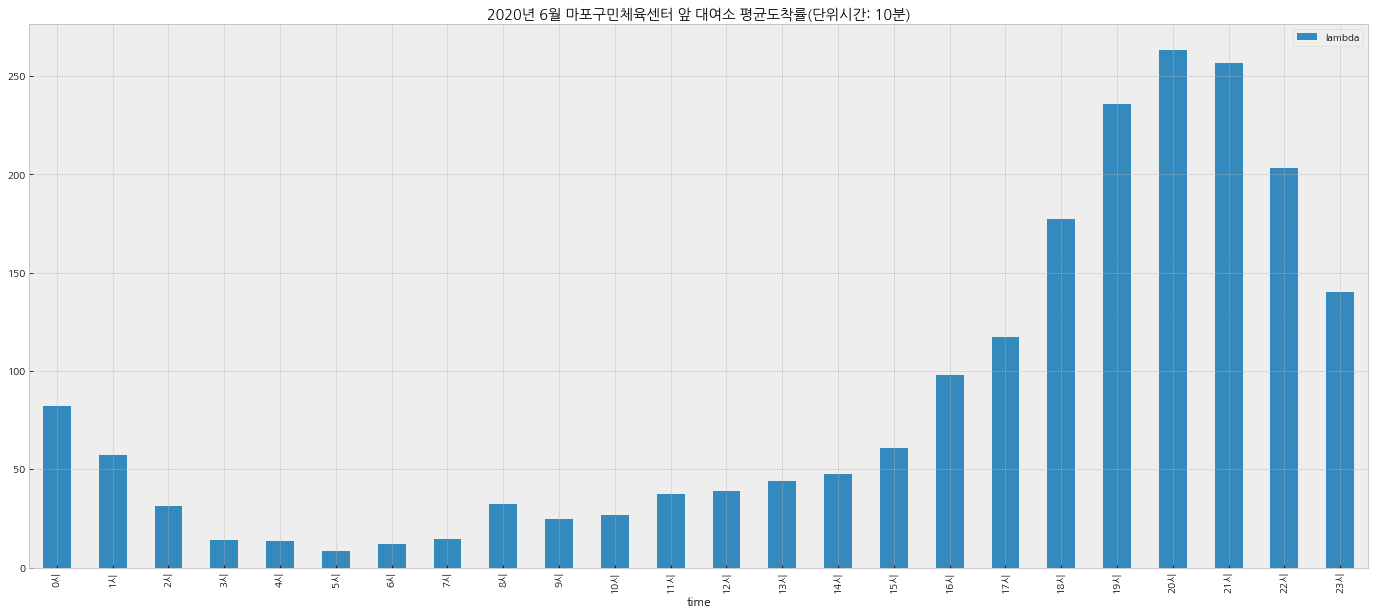

In [113]:
result.plot(kind = 'bar', x = 'time', y = 'lambda', figsize = (24, 10), 
            title = '2020년 6월 마포구민체육센터 앞 대여소 평균도착률(단위시간: 10분)')
plt.show()

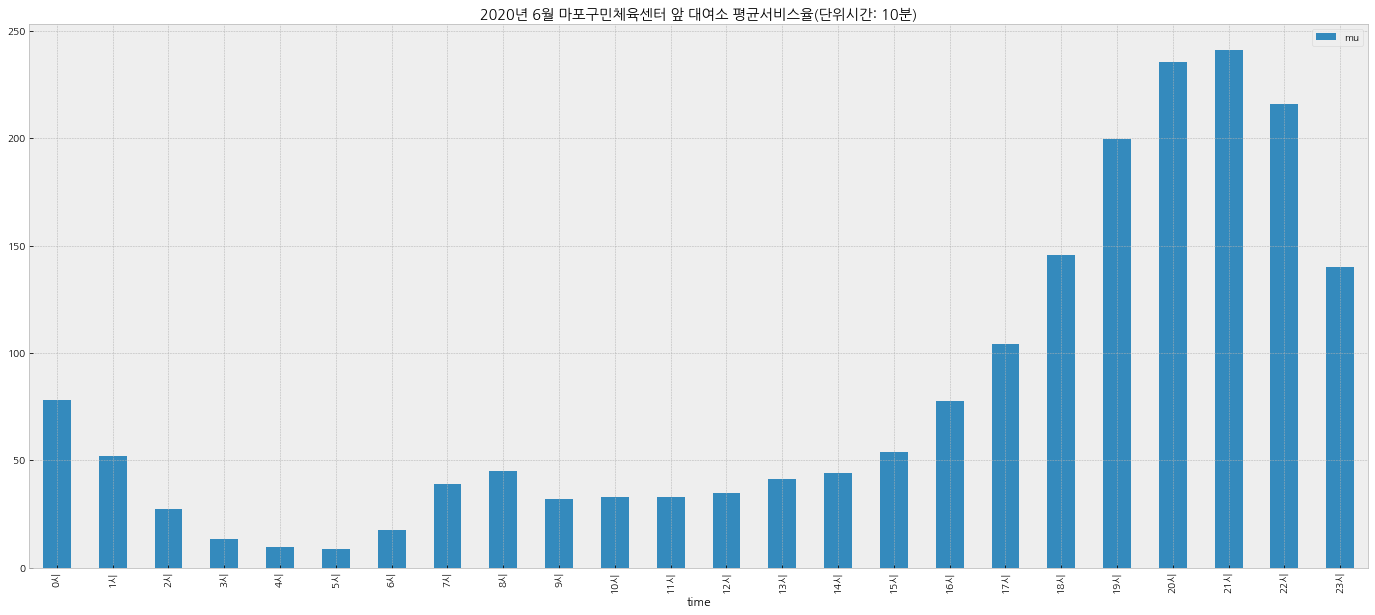

In [114]:
result.plot(kind = 'bar', x = 'time', y = 'mu', figsize = (24, 10), 
            title = '2020년 6월 마포구민체육센터 앞 대여소 평균서비스율(단위시간: 10분)')
plt.show()

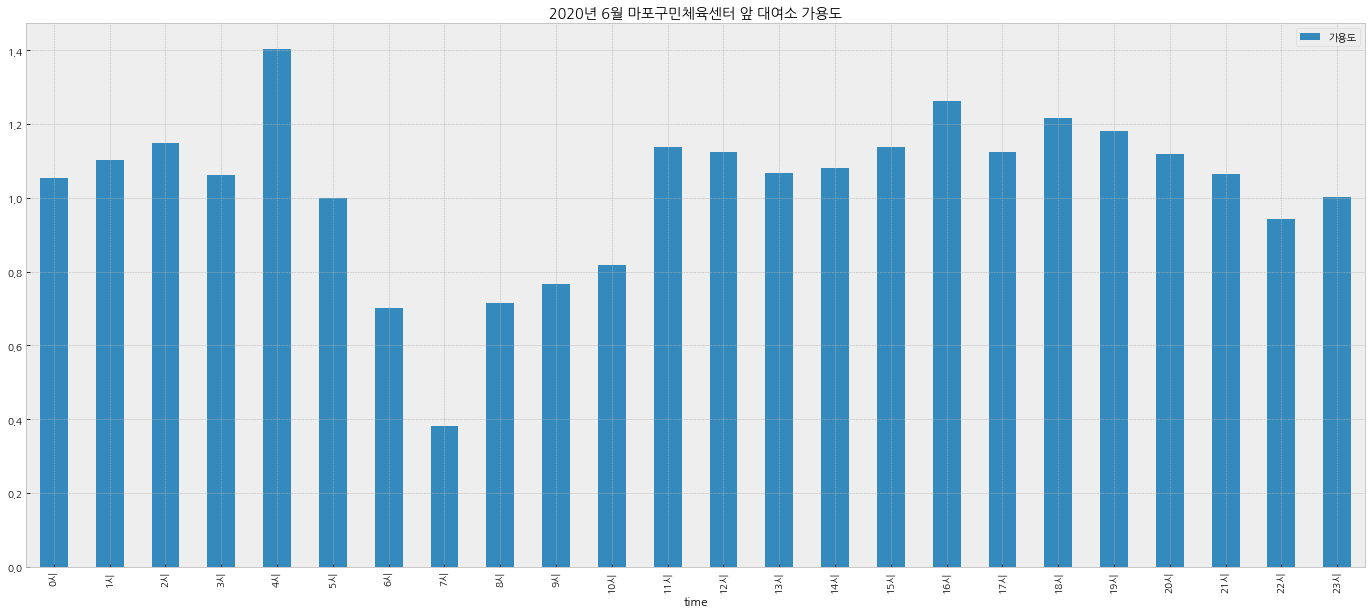

In [115]:
result.plot(kind = 'bar', x = 'time', y = '가용도', figsize = (24, 10), 
            title = '2020년 6월 마포구민체육센터 앞 대여소 가용도')
plt.show()

- 가용도가 1이하인 시간대는 반납보다 대여가 많아서 자전거 빌리기 어려움
- 6시 ~ 10시, 22시에 가용도가 1이하
- 출근시간에만 거의 가용도가 1이하인 것으로 보아 출근시간때 대여가 많을 것으로 예상
- 21년 6월 동일 대여소를 비교해보면 비슷한 편이지만 20년 6월의 출근시간때 가용도가 조금 더 안 좋음
- 출근시간때 이후에는 대부분 가용도가 1 이상이라 이용에 문제 없을 것으로 예상됨